# 1.3. Linear Regression
_________________________________
### Key Concepts:
* QR Decomposition
* Least Squares
* Linear Regression

In [1]:
import numpy as np
import plotly.express as px

# Set Plotly theme
import plotly.io as pio
pio.templates.default = "seaborn"

### Helper Functions

In [2]:
def generate_random_matrix(size: int = 3):
    """
    Generates Random Square Matrix of given Size with Integers (0-99)
    """
    return np.random.randint(0, 100, [size, size])

In [3]:
def project(u, a):
    """
    Project vector u onto a
    """
    return (np.dot(u, a) / np.dot(u, u)) * u

In [4]:
def gram_schmidt_matrix(A):
    """
    Find the Gram-Schmidt of a Matrix
    """

    # Set A to float type
    A = A.astype('float64')

    # Copy A. First column remains the same
    U = np.copy(A.astype('float64'))

    # Copy A. First column is the same but normalized
    E = np.zeros(A.shape)
    E[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])

    # Iterate through each column
    for k in range(1, U.shape[1]):

        u_k = A[:, k]

        # Iterate through each column to the left of k
        for j in range(k):
            u_k -= project(U[:, j], A[:, k])

        # Update U
        U[:, k] = u_k

        # Update E
        E[:, k] = U[:, k] / np.linalg.norm(U[:, k])

    return E

### Global Variables

In [5]:
matrix_size = 3

# Generate a random 3x3 Matrix A
A = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix A:\n", A)

# Generate another random matrix B
B = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix B:\n", B)

Random 3x3 Matrix A:
 [[94 76 77]
 [47 62 32]
 [15 32 48]]
Random 3x3 Matrix B:
 [[89 52 75]
 [64 12 43]
 [54 64 66]]


## QR Decomposition

A square matrix $A$ is decomposed as
$A=QR$
where $Q$ is an orthogonal matrix (i.e. $Q ^T = Q ^{-1}$)
and $R$ is an upper/right triangular matrix

Formulas:
$Q = [e _1 ... e _k ]$
$R = Q ^T A$

In [6]:
def QR(A):
    """
    QR Decomposition of A
    :param A: Square Matrix A
    :return: (Q, R)
    """

    # Calculate Q
    Q = gram_schmidt_matrix(A)

    # Calculate R
    R = np.zeros(A.shape)
    for row in range(A.shape[0]):
        for col in range(row, A.shape[0]):
            R[row, col] = np.dot(A[:, col], Q[:, row])

    return Q, R

In [7]:
Q_A, R_A = QR(A)

print(f"QR Decomposition of A:\n{A}\n")
print(f"Q:\n{Q_A}\n")
print(f"R:\n{R_A}\n")

QR Decomposition of A:
[[94 76 77]
 [47 62 32]
 [15 32 48]]

Q:
[[ 0.88545378 -0.42306842  0.19231411]
 [ 0.44272689  0.64210129 -0.62585848]
 [ 0.14129582  0.63931138  0.75585478]]

R:
[[106.16025622  99.26502041  89.12940056]
 [  0.          28.11504443  18.65791945]
 [  0.           0.          31.06174492]]



#### Verify Q is Orthonormal
$Q \cdot Q ^T = I$

In [8]:
# Calculate QQt
QQt_A = np.dot(Q_A, np.transpose(Q_A))
# Round to 5 decimals
QQt_A = np.round(QQt_A, 5)

print(f"QQt:\n {QQt_A} \n")

# Check if QQt is an Identity Matrix
QQt_is_I = np.allclose(QQt_A, np.eye(A.shape[0]))
print(f"QQt {'IS' if QQt_is_I else 'IS NOT'} an Identity Matrix")

QQt:
 [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]] 

QQt IS an Identity Matrix


#### Verify $A=QR$

In [9]:
# Calculate A=QR
AQR = np.dot(Q_A, R_A)
print(f"A:\n {A} \n")
print(f"QR:\n {AQR} \n")

# Check if QR = A
QR_is_A = np.allclose(AQR, A)
print(f"QR {'==' if QR_is_A else '!='} A")

A:
 [[94 76 77]
 [47 62 32]
 [15 32 48]] 

QR:
 [[94. 76. 77.]
 [47. 62. 32.]
 [15. 32. 48.]] 

QR == A


## Ordinary Least Squares

In [10]:
def generate_random_data(start = 0, end = 100, spacing = 0.1, noise = 1):
    """
    Generates Random Linear Data
    :param start: Starting X Value
    :param end: Ending X Value
    :param spacing: Spacing between values
    :param noise: Noise Ratio
    :return: X, Y
    """
    # Generate X values from params
    X = np.arange(start=start, stop=end, step=spacing)

    # Generate Y values from X and noise
    y_b = np.random.randint(start, end)
    y_m = np.random.randint(-10, 10)

    Y = y_b + (y_m * X) + (np.random.random(len(X)) * noise * 100)

    return X, Y, (y_m, y_b)

In [11]:
def ols(X, Y):
    """
    Ordinary Least Squares
    :param X: X values
    :param Y: Y values
    :return: (slope, intercept)
    """
    # Add ones column to X
    x = np.vstack([X, np.ones(len(X))]).T

    # Convert Y into a column vector
    y = Y[:, np.newaxis]

    # Apply OLS
    p_inv = np.linalg.pinv(x)
    y_params = p_inv.dot(y)

    return round(y_params[0][0], 3), round(y_params[1][0], 3)

OLS Fit: Y = 7.02X + 86.836
Slope Error: 0.29%
Intercept Error: 122.66%


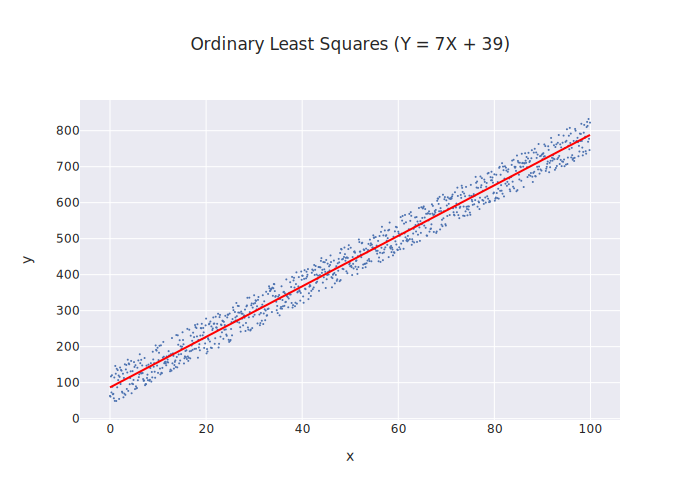

In [12]:
# Generate random data
x_rand, y_rand, (y_slope, y_int) = generate_random_data()

# Apply OLS
ols_m, ols_b = ols(x_rand, y_rand)
print(f"OLS Fit: Y = {ols_m}X + {ols_b}")
print(f"Slope Error: {(abs(y_slope - ols_m)) /y_slope *100:.2f}%")
print(f"Intercept Error: {(abs(y_int - ols_b)) /y_int *100:.2f}%")

# Add the Scatter Plot of Random Points
fig = px.scatter(
    x=x_rand,
    y=y_rand,
    title=f"Ordinary Least Squares (Y = {y_slope}X + {y_int})",
)

# Update markers size
fig.update_traces(marker=dict(size=2))

# Plot the Best Fit Line from OLS
fig.add_traces(
    px.line(
        x=x_rand,
        y=(x_rand*ols_m + ols_b),
        color_discrete_sequence=["red"],
    ).data
)

fig.show("svg")

### Simple Linear Regression
Linear Model: **$y= \beta _0 + \beta _1 \cdot x $**

Slope: **$
\beta _1 =  \frac{S _{xy}}{S _{xx}}
         = \frac{\sum (x _i - \bar x)(y _i - \bar y)}{\sum (x _i - \bar x) ^2}
$**

Intercept: **$
\beta _0 = \bar y - \beta _1 \bar x
$**

In [13]:
def slr(X, Y):
    """
    Simple Linear Regression
    :param X: X values
    :param Y: Y values
    :return: (slope, intercept)
    """

    # Calculate Means
    x_avg = np.mean(X)
    y_avg = np.mean(Y)

    # Calculate Sx = xi - x_avg
    sx = X - x_avg

    # Calculate Sxx
    sxx = np.sum(sx ** 2)

    # Calculate Sxy
    sxy = np.dot((X-x_avg), (Y-y_avg))

    # Calculate Slope
    slope = sxy / sxx

    # Calculate Intercept
    intercept = y_avg - slope * x_avg

    return round(slope, 3), round(intercept, 3)

SLR Fit: Y = 7.02X + 86.836
Slope Error: 0.29%
Intercept Error: 122.66%


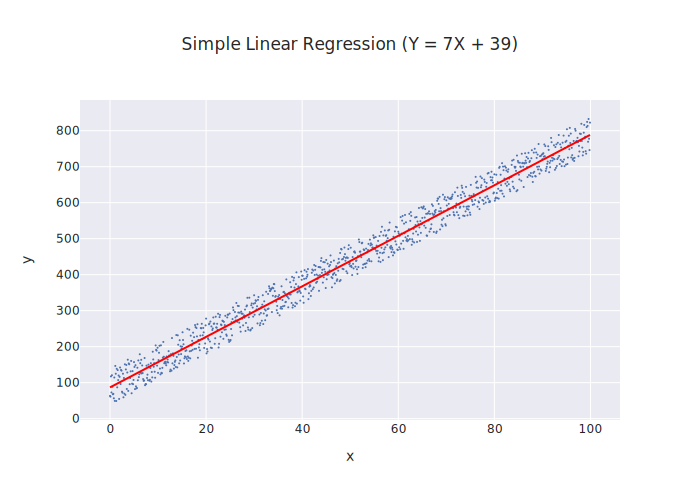

In [14]:
# Apply Simple Linear Regression using same old random data
slr_m, slr_b = slr(x_rand, y_rand)
print(f"SLR Fit: Y = {slr_m}X + {slr_b}")
print(f"Slope Error: {(abs(y_slope - slr_m)) /y_slope *100:.2f}%")
print(f"Intercept Error: {(abs(y_int - slr_b)) /y_int *100:.2f}%")

# Add the Scatter Plot of Random Points
fig = px.scatter(
    x=x_rand,
    y=y_rand,
    title=f"Simple Linear Regression (Y = {y_slope}X + {y_int})",
)

# Update markers size
fig.update_traces(marker=dict(size=2))

# Plot the Best Fit Line from OLS
fig.add_traces(
    px.line(
        x=x_rand,
        y=(x_rand*slr_m + slr_b),
        color_discrete_sequence=["red"],
    ).data
)

fig.show("svg")

### Regression Performance Test

#### Ordinary Least Squares Performance

In [15]:
%%timeit -n 1000
ols(x_rand, y_rand)

139 µs ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Simple Linear Regression Performance

In [16]:
%%timeit -n 1000
slr(x_rand, y_rand)

53.9 µs ± 2.17 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Simple Linear Regression is around 3 times faster than Ordinary Least Squares**